Testing that my NEMO reader works in opendrift

Testing plan
1. 3d NEMO output on CGRID (CIOPSW-3D)
2. 2d NEMO output on CGRID (CIOPSW-2D)
3. 3d NEMO output on AGRID (CIOPSE-3D)
4. 2d NEMO output on AGRID (CIOPSE-2D)



In [1]:
import glob
import os
import datetime

import numpy as np
import xarray as xr

from opendrift.models.oceandrift import OceanDrift
from opendrift.readers import reader_NEMO_native

In [2]:
CIOPSW3D='/home/soontiensn/data/opendrift_test_data/CIOPSW/3D/'
CIOPSW2D='/home/soontiensn/data/opendrift_test_data/CIOPSW/2D/'
CIOPSW_mesh='/home/soontiensn/data/opendrift_test_data/CIOPSW/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc'
CIOPSW3D_mapping={'vo': 'y_sea_water_velocity', 'uo': 'x_sea_water_velocity', 'time_counter': 'time'}
CIOPSW2D_mapping={'vos': 'y_sea_water_velocity', 'uos': 'x_sea_water_velocity', 'time_counter': 'time'}

CIOPSE3D='/home/soontiensn/data/opendrift_test_data/CIOPSE/3D/'
CIOPSE2D='/home/soontiensn/data/opendrift_test_data/CIOPSE/2D/'
CIOPSE_mesh='/home/soontiensn/data/opendrift_test_data/CIOPSE/mesh_mask_NWA36_Bathymetry_flatbdy_20181109_3_filter_min_7p5.nc'
CIOPSE3D_mapping={'vomecrty': 'y_sea_water_velocity', 'vozocrtx': 'x_sea_water_velocity', 'time_counter': 'time'}
CIOPSE2D_mapping={'vomecrty': 'y_sea_water_velocity', 'vozocrtx': 'x_sea_water_velocity', 'time_counter': 'time'}

# CIOPSW - Cgrid

## 3D 

In [3]:
reader = reader_NEMO_native.Reader(os.path.join(CIOPSW3D, '*.nc'),
                                  meshfile=CIOPSW_mesh, variable_mapping=CIOPSW3D_mapping,
                                  rotation_pickle_file='CIOPSW_angles.pickle', model_land_mask=True)
reader

Reader: NEMO native
Projection: 
  +proj=latlong
Coverage: [degrees]
  xmin: -142.283173   xmax: -120.568398   step: 0.0264286   numx: 822
  ymin: 44.333385   ymax: 59.621494   step: 0.013255   numy: 1154
  Corners (lon, lat):
    (-138.12,  59.62)  (-120.57,  56.90)
    (-142.28,  45.05)  (-122.69,  44.33)
Vertical levels [m]: 
  [   0.50753002    1.55756949    2.66934092    3.85788494    5.14191383
    6.54453533    8.09397147    9.82415767   11.77504435   13.99236471
   16.52661505   19.43106879   22.75886112   26.55953148   30.87578506
   35.74142753   41.18125371   47.21313512   53.8518956    61.11412039
   69.0229896    77.61249606   86.93079064   97.04271073  108.03171341
  120.00146911  133.07732682  147.40778644  163.16603545  180.55153922
  199.79161551  221.14287375  244.892354    271.35815779  300.88932529
  333.86468319  370.69037225  411.79577221  457.62758321  508.64190847
  565.29431754  628.02805354  697.26076989  773.37042023  856.68114272
  947.45013658 1045.85658048

In [4]:
reader.plot()

In [5]:
o3D = OceanDrift()
o3D.add_reader([reader,])
lons=np.linspace(-126,-122,num=20)
lats=np.linspace(47,50,num=20)
lons,lats = np.meshgrid(lons,lats)
o3D.seed_elements(lon=lons, lat=lats, z=0, time=reader.start_time)
o3D.set_config('general:use_auto_landmask', False)
o3D.set_config('seed:ocean_only', False)
o3D.run()

10:36:49 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
10:36:49 DEBUG   opendrift.models.basemodel: Adding 4 config items from basemodel
10:36:49 DEBUG   opendrift.models.basemodel: Adding 36 config items from basemodel
10:36:49 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.7.3 / v1.0.4-2020-g0e71dcc-dirty)
10:36:49 DEBUG   opendrift.models.basemodel: Adding 14 config items from oceandrift
10:36:49 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
10:36:49 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 32 for reader NEMO native, assuming a maximum average speed of 1 m/s and time span of 1 day, 0:00:00
10:36:49 DEBUG   opendrift.models.basemodel: Added reader NEMO native
10:36:50 DEBUG   opendrift.models.basemodel: 
------------------------------------------------------
Software and hardware:
  OpenDrift version 1.7.3
  Platform: Linux, 4.15.0-163-generic
  31.331886291503906 GB memory
 

10:36:52 DEBUG   opendrift: NaN values for 23 elements, expanding data 9
10:36:52 DEBUG   opendrift: NaN values for 21 elements, expanding data 10
10:36:52 WARNING opendrift: Still NaN-values after 10 iterations, exiting!
10:36:52 DEBUG   opendrift: NaN values for 45 elements, expanding data 1
10:36:52 DEBUG   opendrift: NaN values for 41 elements, expanding data 2
10:36:52 DEBUG   opendrift: NaN values for 39 elements, expanding data 3
10:36:52 DEBUG   opendrift: NaN values for 35 elements, expanding data 4
10:36:52 DEBUG   opendrift: NaN values for 32 elements, expanding data 5
10:36:52 DEBUG   opendrift: NaN values for 30 elements, expanding data 6
10:36:52 DEBUG   opendrift: NaN values for 29 elements, expanding data 7
10:36:52 DEBUG   opendrift: NaN values for 27 elements, expanding data 8
10:36:52 DEBUG   opendrift: NaN values for 23 elements, expanding data 9
10:36:52 DEBUG   opendrift: NaN values for 21 elements, expanding data 10
10:36:52 WARNING opendrift: Still NaN-values af

10:36:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:00:00) in space  (linearNDFast)
10:36:54 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:36:54 DEBUG   opendrift.readers.basereader.structured: Interpolating after (2018-06-03 00:00:00) in space  (linearNDFast)
10:36:54 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:36:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:00:00, weight 0.96) and
		      after (2018-06-03 00:00:00, weight 0.04) in time
10:36:54 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:36:54 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:36:54 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:36:54 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:36:54 DEBUG   opendrift.mo

10:36:54 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0.916667 (max)
10:36:54 DEBUG   opendrift.models.basemodel: ---------------------------------
10:36:54 DEBUG   opendrift.models.basemodel: 		164 active elements
10:36:54 DEBUG   opendrift.models.basemodel: 		46.985170646430305 <- latitude  -> 50.001606312974495
10:36:54 DEBUG   opendrift.models.basemodel: 		-125.99821776085253 <- longitude -> -122.6

10:36:54 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:36:54 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:36:54 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:36:54 DEBUG   opendrift.models.basemodel: 163 active elements (237 deactivated)
10:36:54 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:36:54 DEBUG   opendrift.models.basemodel: ======================================================================
10:36:54 INFO    opendrift.models.basemodel: 2018-06-02 04:00:00 - step 5 of 48 - 163 active elements (237 deactivated)
10:36:54 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:36:54 DEBUG   opendrift.models.basemodel: ======================================================================
10:36:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:54 DEBUG   opendrift.models.basemodel: Variable group ['x

10:36:54 DEBUG   opendrift.readers.basereader.structured: Interpolating after (2018-06-03 00:00:00) in space  (linearNDFast)
10:36:54 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:36:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:00:00, weight 0.79) and
		      after (2018-06-03 00:00:00, weight 0.21) in time
10:36:54 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:36:54 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:36:54 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:36:54 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:36:54 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:36:54 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusi

10:36:54 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0.75 (max)
10:36:54 DEBUG   opendrift.models.basemodel: ---------------------------------
10:36:54 DEBUG   opendrift.models.basemodel: 		162 active elements
10:36:54 DEBUG   opendrift.models.basemodel: 		46.956189980023865 <- latitude  -> 50.006293485174155
10:36:54 DEBUG   opendrift.models.basemodel: 		-125.9951222593606 <- longitude -> -122.62427845567717
10:36:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:36:54 DEBUG   opendrift.m

10:36:54 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:36:54 DEBUG   opendrift.models.basemodel: 160 active elements (240 deactivated)
10:36:54 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:36:54 DEBUG   opendrift.models.basemodel: ======================================================================
10:36:54 INFO    opendrift.models.basemodel: 2018-06-02 08:00:00 - step 9 of 48 - 160 active elements (240 deactivated)
10:36:54 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:36:54 DEBUG   opendrift.models.basemodel: ======================================================================
10:36:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:54 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
10:36:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:54 DEBUG   opendrift

10:36:54 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:36:54 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:36:54 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:36:54 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.442507 (min) 0.369035 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.488907 (min) 0.259913 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:36:54 DEBUG   o

10:36:54 DEBUG   opendrift.models.basemodel: 		-125.99277340692008 <- longitude -> -122.62122636792539
10:36:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:36:54 DEBUG   opendrift.models.basemodel: ---------------------------------
10:36:54 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:36:54 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:36:54 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:36:54 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:36:54 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (stranded)
10:36:54 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
10:36:54 DEBUG   opendrift.models.basemodel: Removed 2 elements.
10:36:54 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
10:36:54 D

10:36:54 DEBUG   opendrift.models.basemodel: ======================================================================
10:36:54 INFO    opendrift.models.basemodel: 2018-06-02 12:00:00 - step 13 of 48 - 157 active elements (243 deactivated)
10:36:54 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:36:54 DEBUG   opendrift.models.basemodel: ======================================================================
10:36:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:54 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
10:36:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:54 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:36:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:54 DEBUG   opendrift.models.basemodel: Data needed for 157 elements
10:36:54 DEBUG   opendrift.readers.basereader.v

10:36:54 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:36:54 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.452728 (min) 0.289411 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.52452 (min) 0.319656 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_peri

10:36:54 DEBUG   opendrift.models.basemodel: ---------------------------------
10:36:54 DEBUG   opendrift.models.basemodel: 		155 active elements
10:36:54 DEBUG   opendrift.models.basemodel: 		46.89803460222526 <- latitude  -> 50.017667076935744
10:36:54 DEBUG   opendrift.models.basemodel: 		-125.99106865383841 <- longitude -> -122.6126772222979
10:36:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:36:54 DEBUG   opendrift.models.basemodel: ---------------------------------
10:36:54 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:36:54 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:36:54 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:36:54 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:36:54 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deacti

10:36:54 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:36:54 DEBUG   opendrift.models.basemodel: 152 active elements (248 deactivated)
10:36:54 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:36:54 DEBUG   opendrift.models.basemodel: ======================================================================
10:36:54 INFO    opendrift.models.basemodel: 2018-06-02 16:00:00 - step 17 of 48 - 152 active elements (248 deactivated)
10:36:54 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:36:54 DEBUG   opendrift.models.basemodel: ======================================================================
10:36:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:54 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
10:36:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:54 DEBUG   opendrif

10:36:54 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:36:54 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:36:54 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:36:54 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.477908 (min) 0.430008 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.386541 (min) 0.259634 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:36:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:36:54 DEBUG   o

10:36:54 DEBUG   opendrift.models.basemodel: 		-125.98996927796749 <- longitude -> -122.59992008957191
10:36:54 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:36:54 DEBUG   opendrift.models.basemodel: ---------------------------------
10:36:54 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:36:54 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:36:54 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:36:54 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:36:54 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (stranded)
10:36:54 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
10:36:54 DEBUG   opendrift.models.basemodel: Removed 1 elements.
10:36:54 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
10:36:54 D

10:36:55 DEBUG   opendrift.models.basemodel: ======================================================================
10:36:55 INFO    opendrift.models.basemodel: 2018-06-02 20:00:00 - step 21 of 48 - 150 active elements (250 deactivated)
10:36:55 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:36:55 DEBUG   opendrift.models.basemodel: ======================================================================
10:36:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:55 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
10:36:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:55 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:36:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:55 DEBUG   opendrift.models.basemodel: Data needed for 150 elements
10:36:55 DEBUG   opendrift.readers.basereader.v

10:36:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:36:55 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.456964 (min) 0.185696 (max)
10:36:55 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.348363 (min) 0.282117 (max)
10:36:55 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:36:55 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:36:55 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:36:55 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:36:55 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:36:55 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:36:55 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:36:55 DEBUG   opendrift.models.basemodel:     sea_surface_wave_per

10:36:55 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:36:55 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:36:55 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:36:55 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:36:55 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:36:55 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:36:55 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:36:55 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:36:55 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:36:55 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:36:55 DEBUG   opendrift.models.basemodel: 150 active el

10:36:55 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:36:55 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:36:55 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:36:55 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:36:55 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:36:55 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:36:55 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:36:55 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:36:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:36:55 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.454356 (min) 0.19685

10:36:56 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:36:56 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.416227 (min) 0.198258 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.4344 (min) 0.433587 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     sea_surface_wave_perio

10:36:56 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:36:56 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:36:56 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:36:56 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:36:56 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:36:56 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:36:56 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:36:56 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:36:56 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:36:56 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:36:56 DEBUG   opendrift.models.basemodel: 149 active el

10:36:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:56 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:36:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:56 DEBUG   opendrift.models.basemodel: Data needed for 147 elements
10:36:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:36:56 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 00:00:00 (before)
		2018-06-04 00:00:00 (after)
10:36:56 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (32) must be increased. See `Variables.set_buffer_size`.
10:36:56 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00) in space  (linearNDFast)
10:36:56 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:36:56 DEBUG   opendrift:

10:36:56 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:36:56 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:36:56 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:36:56 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:36:56 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:36:56 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.57592 (min) 0.215227 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.411145 (min) 0.445754 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:

10:36:56 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:36:56 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
10:36:56 DEBUG   opendrift.models.basemodel: ---------------------

10:36:57 DEBUG   opendrift.models.basemodel: ---------------------------------
10:36:57 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:36:57 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:36:57 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:36:57 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:36:57 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:36:57 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:36:57 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:36:57 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:36:57 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:36:57 DEBUG   opendrift.models.basemodel: Horizontal diffusivity i

10:36:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:57 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:36:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:57 DEBUG   opendrift.models.basemodel: Data needed for 145 elements
10:36:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:36:57 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 00:00:00 (before)
		2018-06-04 00:00:00 (after)
10:36:57 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (32) must be increased. See `Variables.set_buffer_size`.
10:36:57 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00) in space  (linearNDFast)
10:36:57 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:36:57 DEBUG   opendrift:

10:36:57 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:36:57 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:36:57 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:36:57 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:36:57 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:36:57 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.679031 (min) 0.2383 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.366393 (min) 0.211738 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel: 

10:36:57 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
10:36:57 DEBUG   opendrift.models.basemodel: ---------------------------------
10:36:57 DEBUG   opendrift.models.basemodel: 		145 active elements
10:36:57 DEBUG   opendrift.models.basemodel: 		46.737227217098955 <- latitude  -> 50.04965834978086
10:36:57 DEBUG   opendrift.models.basemodel: 		-126.03027412465929 <- longitude -> -122.57570281308071
10:36:57 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:36:57 DEBUG   opendrift.models.basemodel: ---------------------------------
10:36:57 DEBUG   opendrift.models.physics_me

10:36:57 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:36:57 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:36:57 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:36:57 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:36:57 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:36:57 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:36:57 DEBUG   opendrift.models.basemodel: 144 active elements (256 deactivated)
10:36:57 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:36:57 DEBUG   opendrift.models.basemodel: ======================================================================
10:36:57 INFO    opendrift.models.basemodel: 2018-06-03 13:00:00 - step 38 of 48 - 144 active elements (256 deactivated)
10:36:57 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:36:57 DEBUG   opendrift.model

10:36:57 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (32) must be increased. See `Variables.set_buffer_size`.
10:36:57 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00) in space  (linearNDFast)
10:36:57 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:36:57 DEBUG   opendrift: NaN values for 3 elements, expanding data 1
10:36:57 DEBUG   opendrift: NaN values for 3 elements, expanding data 1
10:36:57 DEBUG   opendrift: NaN values for 3 elements, expanding data 1
10:36:57 DEBUG   opendrift: NaN values for 3 elements, expanding data 1
10:36:57 DEBUG   opendrift.readers.basereader.structured: Interpolating after (2018-06-04 00:00:00) in space  (linearNDFast)
10:36:57 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:36:57 DEBUG   opendrift.readers.basereader.structured: Interpolati

10:36:57 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.501899 (min) 0.238768 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.379047 (min) 0.277927 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:36:57 DEBUG   opend

10:36:57 DEBUG   opendrift.models.basemodel: 		144 active elements
10:36:57 DEBUG   opendrift.models.basemodel: 		46.696344860799265 <- latitude  -> 49.99998150621428
10:36:57 DEBUG   opendrift.models.basemodel: 		-126.04664087489894 <- longitude -> -122.58154373524577
10:36:57 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:36:57 DEBUG   opendrift.models.basemodel: ---------------------------------
10:36:57 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:36:57 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:36:57 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:36:57 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:36:57 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:36:57 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:36:57 D

10:36:57 DEBUG   opendrift.models.basemodel: ======================================================================
10:36:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:57 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
10:36:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:57 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:36:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:57 DEBUG   opendrift.models.basemodel: Data needed for 144 elements
10:36:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:36:57 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 00:00:00 (before)
		2018-06-04 00:00:00 (after)
10:36:57 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positi

10:36:57 DEBUG   opendrift: NaN values for 3 elements, expanding data 1
10:36:57 DEBUG   opendrift: NaN values for 3 elements, expanding data 1
10:36:57 DEBUG   opendrift: NaN values for 3 elements, expanding data 1
10:36:57 DEBUG   opendrift.readers.basereader.structured: Interpolating after (2018-06-04 00:00:00) in space  (linearNDFast)
10:36:57 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:36:57 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 00:00:00, weight 0.21) and
		      after (2018-06-04 00:00:00, weight 0.79) in time
10:36:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:36:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:36:57 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:36:57 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:36:57 DEBUG   opendrift.

10:36:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:36:57 DEBUG   opendrift.models.b

10:36:57 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:36:57 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:36:57 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:36:57 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (stranded)
10:36:57 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
10:36:57 DEBUG   opendrift.models.basemodel: Removed 1 elements.
10:36:57 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
10:36:57 DEBUG   opendrift.models.basemodel: remove items from profile for z
10:36:57 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
10:36:57 DEBUG   opendrift.models.basemodel: Removed 1 values from environment_profiles.
10:36:57 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:36:57 DEBUG   opendrift.m

10:36:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:57 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
10:36:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:57 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:36:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:36:57 DEBUG   opendrift.models.basemodel: Data needed for 142 elements
10:36:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:36:57 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 00:00:00 (before)
		2018-06-04 00:00:00 (after)
10:36:57 WARNING opendrift.readers.basereader.structured: Data block from NEMO native not large enough to cover element positions within timestep. Buffer size (32) must be increased. See `Variables.set_buffer_size`.
10:36:57 DEBUG   opendrift

10:36:57 DEBUG   opendrift.models.basemodel: 		-126.06293223058648 <- longitude -> -122.59364916285001
10:36:57 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:36:57 DEBUG   opendrift.models.basemodel: ---------------------------------


10:36:57 WARNING opendrift.models.basemodel: Plotting fast. This will make your plots less accurate.
10:36:58 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:36:58 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.075430


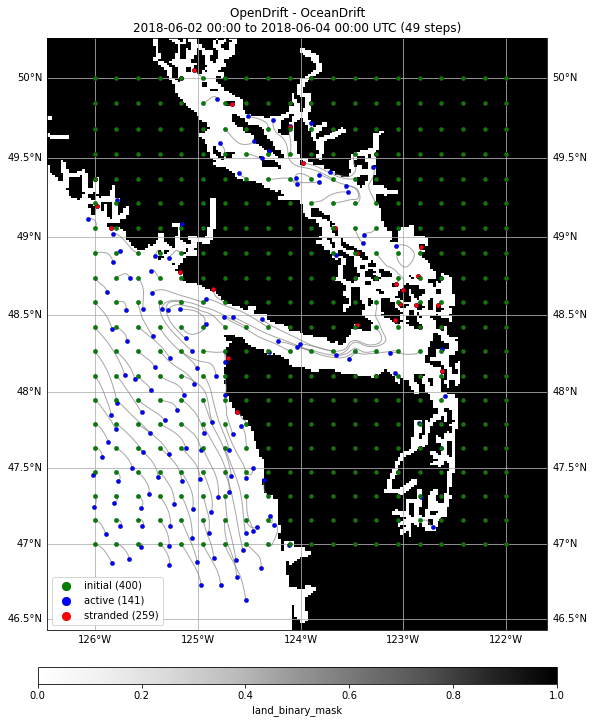

(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2018-06-02 00:00 to 2018-06-04 00:00 UTC (49 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda/envs/opendrift_NEMO_reader_test/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [6]:
o3D.plot(fast=True, background='land_binary_mask', hide_landmask=True,cmap='Greys',)

# 2D Cgrid

In [7]:
reader = reader_NEMO_native.Reader(os.path.join(CIOPSW2D, '*.nc'),
                                  meshfile=CIOPSW_mesh, variable_mapping=CIOPSW2D_mapping,
                                  rotation_pickle_file='CIOPSW_angles.pickle', model_land_mask=True)
reader

10:37:25 INFO    opendrift.readers.reader_NEMO_native: Opening dataset: /home/soontiensn/data/opendrift_test_data/CIOPSW/2D/*.nc
10:37:25 INFO    opendrift.readers.reader_NEMO_native: Opening files with MFDataset
10:37:29 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 9 for reader NEMO native, assuming a maximum average speed of 5 m/s and time span of 1:00:00
10:37:29 DEBUG   opendrift.readers.basereader: Variable mapping: ['sea_floor_depth_below_sea_level'] -> ['land_binary_mask'] is not activated


Reader: NEMO native
Projection: 
  +proj=latlong
Coverage: [degrees]
  xmin: -142.283173   xmax: -120.568398   step: 0.0264286   numx: 822
  ymin: 44.333385   ymax: 59.621494   step: 0.013255   numy: 1154
  Corners (lon, lat):
    (-138.12,  59.62)  (-120.57,  56.90)
    (-142.28,  45.05)  (-122.69,  44.33)
Vertical levels [m]: 
  [   0.50753002    1.55756949    2.66934092    3.85788494    5.14191383
    6.54453533    8.09397147    9.82415767   11.77504435   13.99236471
   16.52661505   19.43106879   22.75886112   26.55953148   30.87578506
   35.74142753   41.18125371   47.21313512   53.8518956    61.11412039
   69.0229896    77.61249606   86.93079064   97.04271073  108.03171341
  120.00146911  133.07732682  147.40778644  163.16603545  180.55153922
  199.79161551  221.14287375  244.892354    271.35815779  300.88932529
  333.86468319  370.69037225  411.79577221  457.62758321  508.64190847
  565.29431754  628.02805354  697.26076989  773.37042023  856.68114272
  947.45013658 1045.85658048

In [8]:
o2D = OceanDrift()
o2D.add_reader([reader,])
lons=np.linspace(-126,-122,num=20)
lats=np.linspace(47,50,num=20)
lons,lats = np.meshgrid(lons,lats)
o2D.seed_elements(lon=lons, lat=lats, z=0, time=reader.start_time)
o2D.set_config('general:use_auto_landmask', False)
o2D.set_config('seed:ocean_only', False)
o2D.run()

10:37:29 DEBUG   opendrift.models.oceandrift: No machine learning correction available.
10:37:29 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
10:37:29 DEBUG   opendrift.models.basemodel: Adding 4 config items from basemodel
10:37:29 DEBUG   opendrift.models.basemodel: Adding 36 config items from basemodel
10:37:30 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.7.3 / v1.0.4-2020-g0e71dcc-dirty)
10:37:30 DEBUG   opendrift.models.basemodel: Adding 14 config items from oceandrift
10:37:30 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
10:37:30 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 4 for reader NEMO native, assuming a maximum average speed of 1 m/s and time span of 1:00:00
10:37:30 DEBUG   opendrift.models.basemodel: Added reader NEMO native
10:37:30 DEBUG   opendrift.models.basemodel: 
------------------------------------------------------
Software and hardware:
  OpenDrift vers

10:37:31 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:37:31 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:37:31 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:37:31 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.380714 (min) 1.33334 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.611216 (min) 1.14613 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:37:31 DEBUG   ope

10:37:31 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:37:31 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
10:37:31 DEBUG   opendrift.models.basemodel: ---------------------

10:37:32 DEBUG   opendrift.models.basemodel: 		-126.00477115045646 <- longitude -> -122.59987204578324
10:37:32 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:37:32 DEBUG   opendrift.models.basemodel: ---------------------------------
10:37:32 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:37:32 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:37:32 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:37:32 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:37:32 DEBUG   opendrift.models.basemodel: 4 elements scheduled for deactivation (stranded)
10:37:32 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
10:37:32 DEBUG   opendrift.models.basemodel: Removed 4 elements.
10:37:32 DEBUG   opendrift.models.basemodel: Removed 4 values from environment.
10:37:32 D

10:37:33 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:37:33 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:37:33 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:37:33 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:37:33 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:37:33 DEBUG   opendrift.models.basemodel: 152 active elements (248 deactivated)
10:37:33 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:37:33 DEBUG   opendrift.models.basemodel: ======================================================================
10:37:33 INFO    opendrift.models.basemodel: 2018-06-01 04:30:00 - step 5 of 71 - 152 active elements (248 deactivated)
10:37:33 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:37:33 DEBUG   opendrift.models.basemodel: ===========================================================

10:37:34 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:34 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:35 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:35 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.760890
10:37:35 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:37:35 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:37:35 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:37:35 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:37:35 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 145x261x2) for time before (2018-06-01 05:30:00)
10:37:35 DEBUG   opendrift.readers.basereader.structured: Interpolating bef

10:37:36 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:37:36 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:37:36 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:37:36 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:37:36 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:37:36 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:37:36 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:37:36 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.526888 (min) 0.544136 (max)
10:37:36 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.676267 (min) 0.324636 (max)
10:37:36 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:37:36 

10:37:36 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:37:36 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:37:36 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:37:36 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:37:36 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:37:36 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:37:36 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:37:36 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:37:36 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:37:36 DEBUG   opendrift.models.b

10:37:37 DEBUG   opendrift.models.basemodel: ---------------------------------
10:37:37 DEBUG   opendrift.models.basemodel: 		146 active elements
10:37:37 DEBUG   opendrift.models.basemodel: 		46.932647150092855 <- latitude  -> 50.0022808763837
10:37:37 DEBUG   opendrift.models.basemodel: 		-126.0206278353948 <- longitude -> -122.58712925363486
10:37:37 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:37:37 DEBUG   opendrift.models.basemodel: ---------------------------------
10:37:37 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:37:37 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:37:37 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:37:37 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:37:37 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactiv

10:37:38 DEBUG   opendrift.models.basemodel: remove items from profile for z
10:37:38 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
10:37:38 DEBUG   opendrift.models.basemodel: Removed 1 values from environment_profiles.
10:37:38 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:37:38 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:37:38 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:37:38 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:37:38 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:37:38 DEBUG   opendrift.models.basemodel: 143 active elements (257 deactivated)
10:37:38 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:37:38 DEBUG   opendrift.models.basemodel: ======================================================================
10:37:38 INFO    opendr

10:37:39 DEBUG   opendrift.models.basemodel: Data needed for 143 elements
10:37:39 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:37:39 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-01 11:30:00 (before)
		2018-06-01 12:30:00 (after)
10:37:39 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:39 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:40 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:40 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.745218
10:37:40 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:37:40 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:37:40 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:37:40 DEBUG   opendrift.readers.interpolation.struc

10:37:41 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:37:41 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:37:41 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:37:41 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:37:41 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:37:41 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.551131 (min) 0.496049 (max)
10:37:41 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.455217 (min) 0.302479 (max)
10:37:41 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:37:41 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:37:41 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:37:41 DEBUG   opendrift.models.basemodel

10:37:41 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:37:41 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:37:41 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:37:41 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:37:41 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:37:41 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
10:37:41 DEBUG   opendrift.models.basemodel: ---------------------------------
10:37:41 DEBUG   opendrift.models.basemodel: 		143 active elements
10:37:41 DEBUG   opendrift.models.basemodel: 		46.87944675565174 <- latitude  -> 49.98446716238645
10:37:41 DEBUG   opendrift.models.basemodel: 		-126.01733312110687 <- longitude -> -122.59618101341415
10:37:41 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:37:41 DEBUG   opendrift.model

10:37:42 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
10:37:42 DEBUG   opendrift.models.basemodel: remove items from profile for z
10:37:42 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
10:37:42 DEBUG   opendrift.models.basemodel: Removed 2 values from environment_profiles.
10:37:42 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:37:42 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:37:42 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:37:42 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:37:42 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:37:42 DEBUG   opendrift.models.basemodel: 141 active elements (259 deactivated)
10:37:42 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:37:42 DEBUG   opendrift.models.basemodel: ==============

10:37:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:37:43 DEBUG   opendrift.models.basemodel: Data needed for 141 elements
10:37:43 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:37:43 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-01 16:30:00 (before)
		2018-06-01 17:30:00 (after)
10:37:43 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:43 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:44 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:44 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.812074
10:37:44 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:37:44 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:37:44 DEBUG   opendrift.readers.basereader.variables: Checking land

10:37:45 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-01 17:30:00) in space  (linearNDFast)
10:37:45 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:37:45 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:37:45 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:37:45 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:37:45 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:37:45 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:37:45 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:37:45 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:37:45 DEBUG   opendrift.models.basemodel: ---

10:37:46 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:37:46 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:37:46 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:37:46 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:37:46 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:37:46 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:37:46 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:37:46 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:37:46 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:37:46 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 

10:37:47 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:37:47 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:37:47 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:37:47 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
10:37:47 DEBUG   opendrift.models.basemodel: ---------------------------------
10:37:47 DEBUG   opendrift.models.basemodel: 		138 active elements
10:37:47 DEBUG   opendrift.models.basemodel: 		46.852179347972665 <- latitude  -> 50.0029951609004
10:37:47 DEBUG   opendrift.models.basemodel: 		-126.00356717703588 <- longitude -> -122.61290802065972
10:37:47 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:37:47 DEBUG   opendrift.models.basemodel: ---------------------------------
10:37:47 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:37:47 DEBUG

10:37:48 DEBUG   opendrift.models.basemodel: 2 elements scheduled for deactivation (stranded)
10:37:48 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
10:37:48 DEBUG   opendrift.models.basemodel: Removed 2 elements.
10:37:48 DEBUG   opendrift.models.basemodel: Removed 2 values from environment.
10:37:48 DEBUG   opendrift.models.basemodel: remove items from profile for z
10:37:48 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
10:37:48 DEBUG   opendrift.models.basemodel: Removed 2 values from environment_profiles.
10:37:48 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:37:48 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:37:48 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:37:48 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:37:48 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no rando

10:37:48 INFO    opendrift.models.basemodel: 2018-06-01 22:30:00 - step 23 of 71 - 133 active elements (267 deactivated)
10:37:48 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:37:48 DEBUG   opendrift.models.basemodel: ======================================================================
10:37:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:37:48 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
10:37:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:37:48 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:37:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:37:48 DEBUG   opendrift.models.basemodel: Data needed for 133 elements
10:37:48 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:37:48 DEBUG   opendrift.readers.basereader.structured: Reader time:

10:37:50 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:37:50 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 135x270x2) for time before (2018-06-01 23:30:00)
10:37:50 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-01 23:30:00) in space  (linearNDFast)
10:37:50 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:37:50 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:37:50 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:37:50 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:37:50 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:37:50 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:37:50 DEBUG   opendrift.models.b

10:37:51 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:37:51 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.692435 (min) 1.58384 (max)
10:37:51 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.421044 (min) 0.867599 (max)
10:37:51 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:37:51 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:37:51 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:37:51 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:37:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:37:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:37:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:37:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_peri

10:37:52 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
10:37:52 DEBUG   opendrift.models.basemodel: ---------------------------------
10:37:52 DEBUG   opendrift.models.basemodel: 		131 active elements
10:37:52 DEBUG   opendrift.models.basemodel: 		46.826607012518146 <- latitude  -> 50.0225912884656
10:37:52 DEBUG   opendrift.models.basemodel: 		-125.99233024823644 <- longitude -> -122.831957272467
10:37:52 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:37:52 DEBUG   opendrift.models.basemodel: ---------------------------------
10:37:52 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:37:52 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:37:52 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:37:52 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.25

10:37:52 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:37:52 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:37:52 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:37:52 DEBUG   opendrift.models.basemodel: 130 active elements (270 deactivated)
10:37:52 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:37:52 DEBUG   opendrift.models.basemodel: ======================================================================
10:37:52 INFO    opendrift.models.basemodel: 2018-06-02 03:30:00 - step 28 of 71 - 130 active elements (270 deactivated)
10:37:52 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:37:52 DEBUG   opendrift.models.basemodel: ======================================================================
10:37:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:37:52 DEBUG   opendrift.models.basemodel: Variable group ['

10:37:54 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:54 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:54 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.762654
10:37:54 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:37:54 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:37:54 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:37:54 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:37:54 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 135x275x2) for time before (2018-06-02 04:30:00)
10:37:54 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 04:30:00) in space  (linearNDFast)
10:37:54 DEBUG   opendrift.

10:37:55 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:37:55 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.944384 (min) 0.415173 (max)
10:37:55 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.487025 (min) 0.413182 (max)
10:37:55 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:37:55 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:37:55 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:37:55 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:37:55 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:37:55 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:37:55 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:37:55 DEBUG   opendrift.models.basemodel:     sea_surface_wave_per

10:37:56 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:37:56 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:37:56 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:37:56 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:37:56 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:37:56 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:37:56 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
10:37:56 DEBUG   opendrift.models.basemodel: ---------------------------------
10:37:56 DEBUG   opendrift.models.basemodel: 		128 active elements
10:37:56 DEBUG   opendrift.models.basemodel: 		46.7689103083875 <- latitude  -> 49.83452789021973
10:37:56 DEBUG   opendrift.models.basemodel: 		-125.98328899526912 <- longitude -> -122.82725311291

10:37:56 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:37:56 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:37:56 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:37:56 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:37:56 DEBUG   opendrift.models.basemodel: 128 active elements (272 deactivated)
10:37:56 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:37:56 DEBUG   opendrift.models.basemodel: ======================================================================
10:37:56 INFO    opendrift.models.basemodel: 2018-06-02 08:30:00 - step 33 of 71 - 128 active elements (272 deactivated)
10:37:56 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:37:56 DEBUG   opendrift.models.basemodel: ======================================================================
10:37:56 DEBUG   opendrift.models.basemodel: ---------------

10:37:57 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:37:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:37:57 DEBUG   opendrift.models.basemodel: Data needed for 126 elements
10:37:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:37:57 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 09:30:00 (before)
		2018-06-02 10:30:00 (after)
10:37:57 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:58 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:58 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:37:58 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.716010
10:37:58 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:37:58 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid value

10:37:59 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:37:59 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:37:59 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:37:59 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:37:59 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:37:59 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:37:59 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:37:59 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.374527 (min) 0.225272 (max)
10:37:59 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.372307 (min) 0.588966 (max)
10:37:59 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:37:59 

10:37:59 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:37:59 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:37:59 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:37:59 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:37:59 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:37:59 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:37:59 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:37:59 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:37:59 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:37:59 DEBUG   opendrift.models.b

10:38:00 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:38:00 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:38:00 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:38:00 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:38:00 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:38:00 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:38:00 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:38:00 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:38:00 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:38:00 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:38:00 DEBUG   opendrift.models.basemodel: 125 active el

10:38:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:01 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:38:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:01 DEBUG   opendrift.models.basemodel: Data needed for 125 elements
10:38:01 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:38:01 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 14:30:00 (before)
		2018-06-02 15:30:00 (after)
10:38:01 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:38:02 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:38:02 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:38:02 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.761852
10:38:02 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:38:02 DEBUG   o

10:38:03 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:38:03 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 135x266x2) for time before (2018-06-02 15:30:00)
10:38:03 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 15:30:00) in space  (linearNDFast)
10:38:03 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:38:03 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:38:03 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:38:03 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:38:03 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:38:03 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:38:03 DEBUG   opendrift.models.b

10:38:04 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:38:04 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:38:04 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:38:04 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:38:04 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:38:04 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:38:04 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:38:04 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:38:04 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:38:04 DEBUG   opendrift.models.basem

10:38:04 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:38:04 DEBUG   opendrift.models.basemodel: ---------------------------------
10:38:04 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:38:04 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:38:04 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:38:04 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:38:04 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:38:04 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:38:04 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:38:04 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:38:04 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:38:04 DEBUG

10:38:05 DEBUG   opendrift.models.basemodel: ======================================================================
10:38:05 INFO    opendrift.models.basemodel: 2018-06-02 19:30:00 - step 44 of 71 - 123 active elements (277 deactivated)
10:38:05 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:38:05 DEBUG   opendrift.models.basemodel: ======================================================================
10:38:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:05 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
10:38:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:05 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:38:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:05 DEBUG   opendrift.models.basemodel: Data needed for 123 elements
10:38:05 DEBUG   opendrift.readers.basereader.v

10:38:07 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:38:07 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:38:07 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 139x269x2) for time before (2018-06-02 20:30:00)
10:38:07 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 20:30:00) in space  (linearNDFast)
10:38:07 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:38:07 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:38:07 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:38:07 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:38:07 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:38:07 DEBUG   o

10:38:08 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:38:08 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:38:08 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:38:08 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:38:08 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:38:08 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:38:08 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:38:08 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:38:08 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:38:08 DEBUG   opendrift.models.base

10:38:08 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:38:08 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
10:38:08 DEBUG   opendrift.models.basemodel: ---------------------------------
10:38:08 DEBUG   opendrift.models.basemodel: 		122 active elements
10:38:08 DEBUG   opendrift.models.basemodel: 		46.65649232073738 <- latitude  -> 49.84173763567063
10:38:08 DEBUG   opendrift.models.basemodel: 		-126.12922482549918 <- longitude -> -122.84374754746922
10:38:08 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:38:08 DEBUG   opendrift.models.basemodel: ---------------------------------
10:38:08 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:38:08 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:38:08 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:38:08 DEBUG   o

10:38:09 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:38:09 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:38:09 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:38:09 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:38:09 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:38:09 DEBUG   opendrift.models.basemodel: 121 active elements (279 deactivated)
10:38:09 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:38:09 DEBUG   opendrift.models.basemodel: ======================================================================
10:38:09 INFO    opendrift.models.basemodel: 2018-06-03 00:30:00 - step 49 of 71 - 121 active elements (279 deactivated)
10:38:09 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:38:09 DEBUG   opendrift.models.basemodel: ==========================================================

10:38:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:10 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:38:10 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:10 DEBUG   opendrift.models.basemodel: Data needed for 119 elements
10:38:10 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:38:10 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 01:30:00 (before)
		2018-06-03 02:30:00 (after)
10:38:10 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:38:10 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:38:11 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:38:11 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.743985
10:38:11 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:38:11 DEBUG   o

10:38:12 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:38:12 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 141x276x2) for time before (2018-06-03 02:30:00)
10:38:12 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 02:30:00) in space  (linearNDFast)
10:38:12 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:38:12 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:38:12 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:38:12 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:38:12 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:38:12 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:38:12 DEBUG   opendrift.models.b

10:38:13 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:38:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:38:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:38:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:38:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:38:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:38:13 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:38:13 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:38:13 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:38:13 DEBUG   opendrift.models.basem

10:38:13 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:38:13 DEBUG   opendrift.models.basemodel: ---------------------------------
10:38:13 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:38:13 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:38:13 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:38:13 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:38:13 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:38:13 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:38:13 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:38:13 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:38:13 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:38:13 DEBUG

10:38:14 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
10:38:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:14 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:38:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:14 DEBUG   opendrift.models.basemodel: Data needed for 118 elements
10:38:14 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:38:14 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 06:30:00 (before)
		2018-06-03 07:30:00 (after)
10:38:14 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:38:15 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:38:15 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:38:15 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.74

10:38:16 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:38:16 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:38:16 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:38:16 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:38:16 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:38:16 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:38:16 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:38:16 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:38:16 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:38:16 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.527351 (min) 0.25226

10:38:17 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:38:17 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:38:17 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:38:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:38:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:38:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:38:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:38:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:38:17 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:38:17 DEBUG   opendrift.models.basemodel:     surface_

10:38:17 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:38:17 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:38:17 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
10:38:17 DEBUG   opendrift.models.basemodel: ---------------------------------
10:38:17 DEBUG   opendrift.models.basemodel: 		116 active elements
10:38:17 DEBUG   opendrift.models.basemodel: 		46.5408980211266 <- latitude  -> 49.857351631657686
10:38:17 DEBUG   opendrift.models.basemodel: 		-126.14604075814174 <- longitude -> -122.84893060940068
10:38:17 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:38:17 DEBUG   opendrift.models.basemodel: ---------------------------------
10:38:17 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:38:17 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:38:17 DEBUG   open

10:38:18 DEBUG   opendrift.models.basemodel: 116 active elements (284 deactivated)
10:38:18 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:38:18 DEBUG   opendrift.models.basemodel: ======================================================================
10:38:18 INFO    opendrift.models.basemodel: 2018-06-03 11:30:00 - step 60 of 71 - 116 active elements (284 deactivated)
10:38:18 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:38:18 DEBUG   opendrift.models.basemodel: ======================================================================
10:38:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:18 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
10:38:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:18 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:38:18 DEBUG   opendrift.models.basemodel

10:38:20 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:38:20 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:38:20 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:38:20 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 140x284x2) for time before (2018-06-03 12:30:00)
10:38:20 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 12:30:00) in space  (linearNDFast)
10:38:20 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:38:20 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:38:20 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:38:20 DEBUG   opendrift.models.basemodel: Obtained data for all element

10:38:21 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:38:21 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:38:21 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:38:21 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:38:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:38:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:38:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:38:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:38:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:38:21 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 

10:38:22 DEBUG   opendrift.models.basemodel: 		46.492574329446505 <- latitude  -> 49.869343853422706
10:38:22 DEBUG   opendrift.models.basemodel: 		-126.13472865854179 <- longitude -> -122.84712686596498
10:38:22 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:38:22 DEBUG   opendrift.models.basemodel: ---------------------------------
10:38:22 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:38:22 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:38:22 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:38:22 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:38:22 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:38:22 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:38:22 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared 

10:38:23 DEBUG   opendrift.models.basemodel: ======================================================================
10:38:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:23 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
10:38:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:23 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:38:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:23 DEBUG   opendrift.models.basemodel: Data needed for 116 elements
10:38:23 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:38:23 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 16:30:00 (before)
		2018-06-03 17:30:00 (after)
10:38:23 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:38:23 DEBUG   opendrift.readers.reader_NEMO_n

10:38:24 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:38:24 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:38:24 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:38:24 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:38:24 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 141x288x2) for time before (2018-06-03 17:30:00)
10:38:24 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 17:30:00) in space  (linearNDFast)
10:38:24 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:38:24 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:38:24 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rot

10:38:25 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.413924 (min) 0.385231 (max)
10:38:25 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:38:25 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:38:25 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:38:25 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:38:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:38:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:38:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:38:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:38:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequenc

10:38:26 DEBUG   opendrift.models.basemodel: 		115 active elements
10:38:26 DEBUG   opendrift.models.basemodel: 		46.4367638570644 <- latitude  -> 49.87043358119295
10:38:26 DEBUG   opendrift.models.basemodel: 		-126.16633841115168 <- longitude -> -122.85180899670775
10:38:26 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:38:26 DEBUG   opendrift.models.basemodel: ---------------------------------
10:38:26 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:38:26 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:38:26 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:38:26 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:38:26 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:38:26 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:38:26 DEB

10:38:27 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:38:27 DEBUG   opendrift.models.basemodel: 114 active elements (286 deactivated)
10:38:27 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:38:27 DEBUG   opendrift.models.basemodel: ======================================================================
10:38:27 INFO    opendrift.models.basemodel: 2018-06-03 21:30:00 - step 70 of 71 - 114 active elements (286 deactivated)
10:38:27 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:38:27 DEBUG   opendrift.models.basemodel: ======================================================================
10:38:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:27 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity', 'land_binary_mask']
10:38:27 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:38:27 DEBUG   opendrif

10:38:29 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:38:29 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:38:29 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:38:29 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:38:29 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 141x292x2) for time before (2018-06-03 22:30:00)
10:38:29 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 22:30:00) in space  (linearNDFast)
10:38:29 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:38:29 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:38:29 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rot

10:38:30 WARNING opendrift.models.basemodel: Plotting fast. This will make your plots less accurate.
10:38:30 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:38:30 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.072122


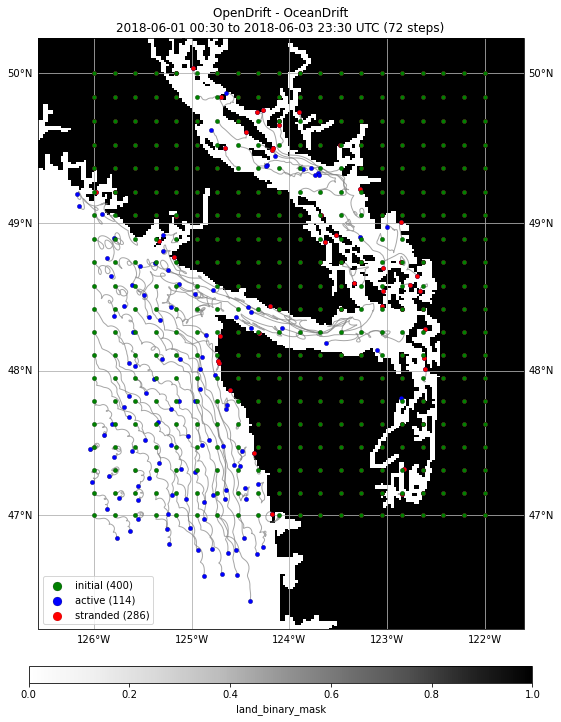

(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2018-06-01 00:30 to 2018-06-03 23:30 UTC (72 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda/envs/opendrift_NEMO_reader_test/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [9]:
o2D.plot(fast=True, background='land_binary_mask', hide_landmask=True,cmap='Greys',)

# CIOPSE - Agrid

# 3D

In [10]:
reader = reader_NEMO_native.Reader(os.path.join(CIOPSE3D, '*.nc'),
                                  meshfile=CIOPSE_mesh, variable_mapping=CIOPSE3D_mapping,
                                  rotation_pickle_file='CIOPSE_angles.pickle', model_land_mask=True,
                                  grid_type='agrid')
reader

10:38:59 INFO    opendrift.readers.reader_NEMO_native: Opening dataset: /home/soontiensn/data/opendrift_test_data/CIOPSE/3D/*.nc
10:38:59 INFO    opendrift.readers.reader_NEMO_native: Opening files with MFDataset
10:39:09 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 8 for reader NEMO native, assuming a maximum average speed of 5 m/s and time span of 1:00:00
10:39:09 DEBUG   opendrift.readers.basereader: Variable mapping: ['sea_floor_depth_below_sea_level'] -> ['land_binary_mask'] is not activated


Reader: NEMO native
Projection: 
  +proj=latlong
Coverage: [degrees]
  xmin: -78.184006   xmax: -37.714161   step: 0.0279455   numx: 1449
  ymin: 34.877529   ymax: 54.302624   step: 0.0190481   numy: 1020
  Corners (lon, lat):
    (-78.18,  51.44)  (-38.42,  54.30)
    (-76.88,  34.88)  (-37.71,  35.18)
Vertical levels [m]: 
  [   0.50753002    1.55756949    2.66934092    3.85788494    5.14191383
    6.54453533    8.09397147    9.82415767   11.77504435   13.99236471
   16.52661505   19.43106879   22.75886112   26.55953148   30.87578506
   35.74142753   41.18125371   47.21313512   53.8518956    61.11412039
   69.0229896    77.61249606   86.93079064   97.04271073  108.03171341
  120.00146911  133.07732682  147.40778644  163.16603545  180.55153922
  199.79161551  221.14287375  244.892354    271.35815779  300.88932529
  333.86468319  370.69037225  411.79577221  457.62758321  508.64190847
  565.29431754  628.02805354  697.26076989  773.37042023  856.68114272
  947.45013658 1045.85658048 115

In [11]:
o3D = OceanDrift()
o3D.add_reader([reader,])
lons=np.linspace(-70,-65,num=20)
lats=np.linspace(47.5,50,num=20)
lons,lats = np.meshgrid(lons,lats)
o3D.seed_elements(lon=lons, lat=lats, z=0, time=reader.start_time)
o3D.set_config('general:use_auto_landmask', False)
o3D.set_config('seed:ocean_only', False)
o3D.run()

10:39:09 DEBUG   opendrift.models.oceandrift: No machine learning correction available.
10:39:09 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
10:39:09 DEBUG   opendrift.models.basemodel: Adding 4 config items from basemodel
10:39:09 DEBUG   opendrift.models.basemodel: Adding 36 config items from basemodel
10:39:09 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.7.3 / v1.0.4-2021-g908a678-dirty)
10:39:09 DEBUG   opendrift.models.basemodel: Adding 14 config items from oceandrift
10:39:09 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
10:39:09 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 4 for reader NEMO native, assuming a maximum average speed of 1 m/s and time span of 1:00:00
10:39:09 DEBUG   opendrift.models.basemodel: Added reader NEMO native
10:39:09 DEBUG   opendrift.models.basemodel: 
------------------------------------------------------
Software and hardware:
  OpenDrift vers

10:39:17 DEBUG   opendrift: NaN values for 223 elements, expanding data 8
10:39:17 DEBUG   opendrift: NaN values for 217 elements, expanding data 9
10:39:17 DEBUG   opendrift: NaN values for 205 elements, expanding data 10
10:39:17 WARNING opendrift: Still NaN-values after 10 iterations, exiting!
10:39:17 DEBUG   opendrift: NaN values for 306 elements, expanding data 1
10:39:17 DEBUG   opendrift: NaN values for 293 elements, expanding data 2
10:39:17 DEBUG   opendrift: NaN values for 277 elements, expanding data 3
10:39:17 DEBUG   opendrift: NaN values for 266 elements, expanding data 4
10:39:17 DEBUG   opendrift: NaN values for 260 elements, expanding data 5
10:39:17 DEBUG   opendrift: NaN values for 247 elements, expanding data 6
10:39:17 DEBUG   opendrift: NaN values for 235 elements, expanding data 7
10:39:17 DEBUG   opendrift: NaN values for 223 elements, expanding data 8
10:39:17 DEBUG   opendrift: NaN values for 217 elements, expanding data 9
10:39:17 DEBUG   opendrift: NaN valu

10:39:26 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-06 01:00:00) in space  (linearNDFast)
10:39:26 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:39:26 DEBUG   opendrift: NaN values for 12 elements, expanding data 1
10:39:26 DEBUG   opendrift: NaN values for 3 elements, expanding data 2
10:39:26 DEBUG   opendrift: NaN values for 1 elements, expanding data 3
10:39:26 DEBUG   opendrift: NaN values for 12 elements, expanding data 1
10:39:26 DEBUG   opendrift: NaN values for 3 elements, expanding data 2
10:39:26 DEBUG   opendrift: NaN values for 1 elements, expanding data 3
10:39:26 DEBUG   opendrift: NaN values for 12 elements, expanding data 1
10:39:26 DEBUG   opendrift: NaN values for 3 elements, expanding data 2
10:39:26 DEBUG   opendrift: NaN values for 1 elements, expanding data 3
10:39:26 DEBUG   opendrift: NaN values for 12 elements, expanding data 1
10:39:26 DEBUG   opendrift: NaN values for 3 elements, expandi

10:39:34 DEBUG   opendrift: NaN values for 6 elements, expanding data 1
10:39:34 DEBUG   opendrift: NaN values for 1 elements, expanding data 2
10:39:34 DEBUG   opendrift: NaN values for 6 elements, expanding data 1
10:39:34 DEBUG   opendrift: NaN values for 1 elements, expanding data 2
10:39:34 DEBUG   opendrift: NaN values for 6 elements, expanding data 1
10:39:34 DEBUG   opendrift: NaN values for 1 elements, expanding data 2
10:39:34 DEBUG   opendrift: NaN values for 6 elements, expanding data 1
10:39:34 DEBUG   opendrift: NaN values for 1 elements, expanding data 2
10:39:34 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:39:34 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:39:34 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:39:34 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:39:34 DEBUG   opendrift.models.ba

10:39:43 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:39:43 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:39:43 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:39:43 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:39:43 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:39:43 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:39:43 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.310203 (min) 2.12855 (max)
10:39:43 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.32732 (min) 1.1046 (max)
10:39:43 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:39:43 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:39:43 DEBUG   opendrift.models.basemodel:     upward_sea_wa

10:39:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:39:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:39:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:39:52 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:39:52 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:39:52 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:39:52 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:39:52 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:39:52 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:39:52 DEBUG   opendrift.models.basemode

10:40:01 DEBUG   opendrift.models.basemodel: 		-69.87138487769722 <- longitude -> -64.9159057282356
10:40:01 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:40:01 DEBUG   opendrift.models.basemodel: ---------------------------------
10:40:01 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:40:01 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:40:01 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:40:01 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:40:01 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:40:01 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:40:01 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:40:01 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:40:

10:40:09 DEBUG   opendrift.models.basemodel: remove items from profile for z
10:40:09 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
10:40:09 DEBUG   opendrift.models.basemodel: Removed 1 values from environment_profiles.
10:40:09 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:40:09 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:40:09 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:40:09 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:40:09 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:40:09 DEBUG   opendrift.models.basemodel: 102 active elements (298 deactivated)
10:40:09 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:40:09 DEBUG   opendrift.models.basemodel: ======================================================================
10:40:09 INFO    opendr

10:40:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:40:18 DEBUG   opendrift.models.basemodel: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity', 'land_binary_mask']
10:40:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:40:18 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:40:18 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:40:18 DEBUG   opendrift.models.basemodel: Data needed for 102 elements
10:40:18 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:40:18 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-06 08:00:00 (before)
		2020-09-06 09:00:00 (after)
10:40:26 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:40:26 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:40:27 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:40:27

10:40:27 DEBUG   opendrift.models.basemodel: Data needed for 101 elements
10:40:27 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:40:27 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-06 09:00:00 (before)
		2020-09-06 10:00:00 (after)
10:40:34 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:40:35 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:40:35 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:40:35 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:08.659372
10:40:35 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:40:35 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:40:35 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:40:35 DEBUG   opendrift.readers.interpolation.struc

10:40:44 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-06 10:00:00) in space  (linearNDFast)
10:40:44 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:40:44 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
10:40:44 DEBUG   opendrift: NaN values for 1 elements, expanding data 2
10:40:44 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
10:40:44 DEBUG   opendrift: NaN values for 1 elements, expanding data 2
10:40:44 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
10:40:44 DEBUG   opendrift: NaN values for 1 elements, expanding data 2
10:40:44 DEBUG   opendrift: NaN values for 9 elements, expanding data 1
10:40:44 DEBUG   opendrift: NaN values for 1 elements, expanding data 2
10:40:44 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:40:44 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors

10:40:53 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:40:53 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:40:53 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:40:53 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:40:53 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:40:53 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:40:53 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.139374 (min) 0.742258 (max)
10:40:53 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.489175 (min) 0.360844 (max)
10:40:53 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:40:53 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:40:53 DEBUG   opendrift.models.basemodel:     upward_se

10:41:01 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:41:01 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:41:01 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:41:01 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:41:01 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:41:01 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:41:01 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:41:01 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:41:01 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:41:01 DEBUG   opendrift.models.basemode

10:41:10 DEBUG   opendrift.models.basemodel: 		-69.8711913691059 <- longitude -> -64.79036489956046
10:41:10 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:41:10 DEBUG   opendrift.models.basemodel: ---------------------------------
10:41:10 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:41:10 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:41:10 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:41:10 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:41:10 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:41:10 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:41:10 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:41:10 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:41:

10:41:19 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:41:19 DEBUG   opendrift.models.basemodel: ======================================================================
10:41:19 INFO    opendrift.models.basemodel: 2020-09-06 15:00:00 - step 16 of 48 - 101 active elements (299 deactivated)
10:41:19 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:41:19 DEBUG   opendrift.models.basemodel: ======================================================================
10:41:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:41:19 DEBUG   opendrift.models.basemodel: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity', 'land_binary_mask']
10:41:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:41:19 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:41:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:41:19 DEBUG   opendrift.models.basemo

10:41:35 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:41:35 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:41:36 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:41:36 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:08.626574
10:41:36 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:41:36 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:41:36 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:41:36 DEBUG   opendrift.readers.interpolation.structured: Filled NaN-values toward seafloor for :['x_sea_water_velocity', 'y_sea_water_velocity']
10:41:36 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:41:36 DEBUG   opendrift.readers.basereader.structured:

10:41:45 DEBUG   opendrift: NaN values for 5 elements, expanding data 1
10:41:45 DEBUG   opendrift: NaN values for 5 elements, expanding data 1
10:41:45 DEBUG   opendrift: NaN values for 5 elements, expanding data 1
10:41:45 DEBUG   opendrift: NaN values for 5 elements, expanding data 1
10:41:45 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:41:45 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:41:45 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:41:45 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:41:45 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:41:45 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:41:45 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_dif

10:41:53 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:41:53 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:41:53 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:41:53 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:41:53 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:41:53 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:41:53 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:41:53 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:41:53 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:41:53 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 

10:42:02 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:42:02 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:42:02 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
10:42:02 DEBUG   opendrift.models.basemodel: ---------------------------------
10:42:02 DEBUG   opendrift.models.basemodel: 		101 active elements
10:42:02 DEBUG   opendrift.models.basemodel: 		47.78941711224154 <- latitude  -> 50.005135601457276
10:42:02 DEBUG   opendrift.models.basemodel: 		-69.67210816710576 <- longitude -> -64.68989947988008
10:42:02 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:42:02 DEBUG   opendrift.models.basemodel: ---------------------------------
10:42:02 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:42:02 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:42:02 DEBUG   opend

10:42:11 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:42:11 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:42:11 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deactivation (stranded)
10:42:11 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
10:42:11 DEBUG   opendrift.models.basemodel: Removed 1 elements.
10:42:11 DEBUG   opendrift.models.basemodel: Removed 1 values from environment.
10:42:11 DEBUG   opendrift.models.basemodel: remove items from profile for z
10:42:11 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
10:42:11 DEBUG   opendrift.models.basemodel: Removed 1 values from environment_profiles.
10:42:11 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:42:11 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:42:11 DEBUG   opendrift.mod

10:42:19 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:42:19 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:42:19 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:42:19 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:42:19 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:42:19 DEBUG   opendrift.models.basemodel: 97 active elements (303 deactivated)
10:42:19 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:42:19 DEBUG   opendrift.models.basemodel: ======================================================================
10:42:19 INFO    opendrift.models.basemodel: 2020-09-06 22:00:00 - step 23 of 48 - 97 active elements (303 deactivated)
10:42:19 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:42:19 DEBUG   opendrift.models.basemodel: ============================================================

10:42:28 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:42:28 DEBUG   opendrift.models.basemodel: ======================================================================
10:42:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:42:28 DEBUG   opendrift.models.basemodel: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity', 'land_binary_mask']
10:42:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:42:28 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:42:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:42:28 DEBUG   opendrift.models.basemodel: Data needed for 96 elements
10:42:28 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:42:28 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-06 23:00:00 (before)
		2020-09-07 00:00:00 (after)
10:42:36 DEBUG   opendrift.readers.reader_NEMO_native: Makin

10:42:45 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:42:45 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:42:45 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:42:45 DEBUG   opendrift.readers.interpolation.structured: Filled NaN-values toward seafloor for :['x_sea_water_velocity', 'y_sea_water_velocity']
10:42:45 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:42:45 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 200x138x2) for time before (2020-09-07 00:00:00)
10:42:45 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-07 00:00:00) in space  (linearNDFast)
10:42:45 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:42:45 DEBUG   opendrift: NaN values for 5 

10:42:54 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:42:54 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:42:54 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:42:54 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:42:54 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:42:54 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:42:54 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:42:54 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.120757 (min) 0.908603 (max)
10:42:54 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.503071 (min) 0.847402 (max)
10:42:54 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:42:54 

10:43:03 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:43:03 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:43:03 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:43:03 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:43:03 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:43:03 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:43:03 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:43:03 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:43:03 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:43:03 DEBUG   opendrift.models.basemod

10:43:12 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
10:43:12 DEBUG   opendrift.models.basemodel: ---------------------------------
10:43:12 DEBUG   opendrift.models.basemodel: 		96 active elements
10:43:12 DEBUG   opendrift.models.basemodel: 		47.790866393530926 <- latitude  -> 50.01691069712446
10:43:12 DEBUG   opendrift.models.basemodel: 		-69.70810927623953 <- longitude -> -64.53576411487127
10:43:12 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:43:12 DEBUG   opendrift.models.basemodel: ---------------------------------
10:43:12 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:43:12 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:43:12 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:43:12 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.25

10:43:20 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:43:20 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:43:20 DEBUG   opendrift.models.basemodel: 96 active elements (304 deactivated)
10:43:20 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:43:20 DEBUG   opendrift.models.basemodel: ======================================================================
10:43:20 INFO    opendrift.models.basemodel: 2020-09-07 05:00:00 - step 30 of 48 - 96 active elements (304 deactivated)
10:43:20 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:43:20 DEBUG   opendrift.models.basemodel: ======================================================================
10:43:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:43:20 DEBUG   opendrift.models.basemodel: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity', 'land_binary_mask']
10:43:20 DEBUG   open

10:43:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:43:29 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:43:29 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:43:29 DEBUG   opendrift.models.basemodel: Data needed for 96 elements
10:43:29 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:43:29 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-07 06:00:00 (before)
		2020-09-07 07:00:00 (after)
10:43:37 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:43:37 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:43:38 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:43:38 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:08.816622
10:43:38 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:43:38 DEBUG   op

10:43:47 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:43:47 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:43:47 DEBUG   opendrift.readers.interpolation.structured: Filled NaN-values toward seafloor for :['x_sea_water_velocity', 'y_sea_water_velocity']
10:43:47 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:43:47 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 197x139x2) for time before (2020-09-07 07:00:00)
10:43:47 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-07 07:00:00) in space  (linearNDFast)
10:43:47 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:43:47 DEBUG   opendrift: NaN values for 7 elements, expanding data 1
10:43:47 DEBUG   opendrift: NaN values for 7 elements, expanding data 1
10:43:4

10:43:56 DEBUG   opendrift: NaN values for 6 elements, expanding data 1
10:43:56 DEBUG   opendrift: NaN values for 1 elements, expanding data 2
10:43:56 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:43:56 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:43:56 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:43:56 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:43:56 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:43:56 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:43:56 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:43:56 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:43:56 DEBUG   opendrift.models.base

10:44:04 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:44:04 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:44:04 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.976494 (min) 0.673133 (max)
10:44:04 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.518198 (min) 0.364984 (max)
10:44:04 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:44:04 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:44:04 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:44:04 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:44:04 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:44:04 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:44:04 DEBUG   opendrift.models.basemodel:     sea_s

10:44:13 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:44:13 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:44:13 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:44:13 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:44:13 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:44:13 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:44:13 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
10:44:13 DEBUG   opendrift.models.basemodel: ---------------------------------
10:44:13 DEBUG   opendrift.models.basemodel: 		95 active elements
10:44:13 DEBUG   opendrift.models.basemodel: 		47.7778390668639 <- latitude  -> 50.04242863158603
10:44:13 DEBUG   opendrift.models.basemodel: 		-69.65556641641982 <- longitude -> -64.5173936189247


10:44:22 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:44:22 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:44:22 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:44:22 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:44:22 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:44:22 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:44:22 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:44:22 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:44:22 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:44:22 DEBUG   opendrift.models.basemodel: 95 active elements (305 deactivated)
10:44:22 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:44:22 DEBUG   

10:44:31 DEBUG   opendrift.models.basemodel: ======================================================================
10:44:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:44:31 DEBUG   opendrift.models.basemodel: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity', 'land_binary_mask']
10:44:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:44:31 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:44:31 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:44:31 DEBUG   opendrift.models.basemodel: Data needed for 95 elements
10:44:31 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:44:31 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-07 13:00:00 (before)
		2020-09-07 14:00:00 (after)
10:44:38 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:44:39 DEBUG   opendrift.readers.reader_NEMO_na

10:44:48 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:44:48 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:44:48 DEBUG   opendrift.readers.interpolation.structured: Filled NaN-values toward seafloor for :['x_sea_water_velocity', 'y_sea_water_velocity']
10:44:48 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:44:48 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 200x142x2) for time before (2020-09-07 14:00:00)
10:44:48 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-07 14:00:00) in space  (linearNDFast)
10:44:48 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:44:48 DEBUG   opendrift: NaN values for 3 elements, expanding data 1
10:44:48 DEBUG   opendrift: NaN values for 3 elements, expanding data 1
10:44:4

10:44:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:44:57 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:44:57 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:44:57 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:44:57 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:44:57 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:44:57 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.0975781 (min) 0.771133 (max)
10:44:57 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.234966 (min) 0.787371 (max)
10:44:57 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:44:57 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:44:57 DEBUG   opendrift.models.basemodel:     upward_s

10:45:05 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:45:05 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:45:05 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:45:05 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:45:05 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:45:05 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:45:05 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:45:05 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:45:05 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:45:05 DEBUG   opendrift.models.basemode

10:45:14 DEBUG   opendrift.models.basemodel: 		-69.55295038063358 <- longitude -> -64.40945178920218
10:45:14 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:45:14 DEBUG   opendrift.models.basemodel: ---------------------------------
10:45:14 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:45:14 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:45:14 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:45:14 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:45:14 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:45:14 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:45:14 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:45:14 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:45

10:45:23 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:45:23 DEBUG   opendrift.models.basemodel: ======================================================================
10:45:23 INFO    opendrift.models.basemodel: 2020-09-07 19:00:00 - step 44 of 48 - 95 active elements (305 deactivated)
10:45:23 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:45:23 DEBUG   opendrift.models.basemodel: ======================================================================
10:45:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:45:23 DEBUG   opendrift.models.basemodel: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity', 'land_binary_mask']
10:45:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:45:23 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:45:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:45:23 DEBUG   opendrift.models.basemod

10:45:39 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:45:40 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:45:40 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:45:40 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:08.660015
10:45:40 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:45:40 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:45:40 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:45:40 DEBUG   opendrift.readers.interpolation.structured: Filled NaN-values toward seafloor for :['x_sea_water_velocity', 'y_sea_water_velocity']
10:45:40 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:45:40 DEBUG   opendrift.readers.basereader.structured:

10:45:49 DEBUG   opendrift: NaN values for 4 elements, expanding data 1
10:45:49 DEBUG   opendrift: NaN values for 4 elements, expanding data 1
10:45:49 DEBUG   opendrift: NaN values for 4 elements, expanding data 1
10:45:49 DEBUG   opendrift: NaN values for 4 elements, expanding data 1
10:45:49 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:45:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:45:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:45:49 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:45:49 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:45:49 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:45:49 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_dif

10:45:58 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:45:58 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:45:58 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:45:58 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:45:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:45:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:45:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:45:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:45:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:45:58 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 

10:46:07 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:46:07 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:46:07 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
10:46:07 DEBUG   opendrift.models.basemodel: ---------------------------------
10:46:07 DEBUG   opendrift.models.basemodel: 		95 active elements
10:46:07 DEBUG   opendrift.models.basemodel: 		47.83994216537114 <- latitude  -> 50.152371189157044
10:46:07 DEBUG   opendrift.models.basemodel: 		-69.68308411234871 <- longitude -> -64.40952973462166
10:46:07 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:46:07 DEBUG   opendrift.models.basemodel: ---------------------------------
10:46:07 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:46:07 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:46:07 DEBUG   opendr

10:46:16 WARNING opendrift.models.basemodel: Plotting fast. This will make your plots less accurate.
10:46:16 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:46:16 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.040911


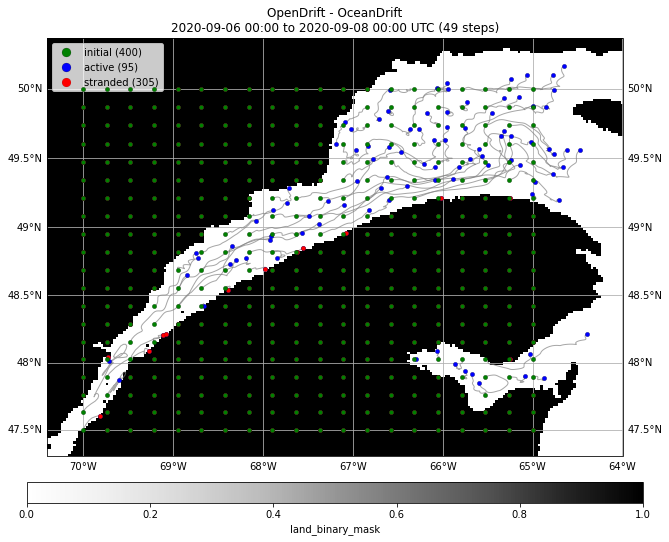

(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2020-09-06 00:00 to 2020-09-08 00:00 UTC (49 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda/envs/opendrift_NEMO_reader_test/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [12]:
o3D.plot(fast=True, background='land_binary_mask', hide_landmask=True,cmap='Greys')

# 2d

In [13]:
reader = reader_NEMO_native.Reader(os.path.join(CIOPSE2D, '*.nc'),
                                  meshfile=CIOPSE_mesh, variable_mapping=CIOPSE2D_mapping,
                                  rotation_pickle_file='CIOPSE_angles.pickle', model_land_mask=True,
                                  grid_type='agrid')
reader

10:46:36 INFO    opendrift.readers.reader_NEMO_native: Opening dataset: /home/soontiensn/data/opendrift_test_data/CIOPSE/2D/*.nc
10:46:36 INFO    opendrift.readers.reader_NEMO_native: Opening files with MFDataset
10:46:46 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 8 for reader NEMO native, assuming a maximum average speed of 5 m/s and time span of 1:00:00
10:46:46 DEBUG   opendrift.readers.basereader: Variable mapping: ['sea_floor_depth_below_sea_level'] -> ['land_binary_mask'] is not activated


Reader: NEMO native
Projection: 
  +proj=latlong
Coverage: [degrees]
  xmin: -78.184006   xmax: -37.714161   step: 0.0279455   numx: 1449
  ymin: 34.877529   ymax: 54.302624   step: 0.0190481   numy: 1020
  Corners (lon, lat):
    (-78.18,  51.44)  (-38.42,  54.30)
    (-76.88,  34.88)  (-37.71,  35.18)
Vertical levels [m]: 
  [   0.50753002    1.55756949    2.66934092    3.85788494    5.14191383
    6.54453533    8.09397147    9.82415767   11.77504435   13.99236471
   16.52661505   19.43106879   22.75886112   26.55953148   30.87578506
   35.74142753   41.18125371   47.21313512   53.8518956    61.11412039
   69.0229896    77.61249606   86.93079064   97.04271073  108.03171341
  120.00146911  133.07732682  147.40778644  163.16603545  180.55153922
  199.79161551  221.14287375  244.892354    271.35815779  300.88932529
  333.86468319  370.69037225  411.79577221  457.62758321  508.64190847
  565.29431754  628.02805354  697.26076989  773.37042023  856.68114272
  947.45013658 1045.85658048 115

In [14]:
o2D = OceanDrift()
o2D.add_reader([reader,])
lons=np.linspace(-70,-65,num=20)
lats=np.linspace(47.5,50,num=20)
lons,lats = np.meshgrid(lons,lats)
o2D.seed_elements(lon=lons, lat=lats, z=0, time=reader.start_time)
o2D.set_config('general:use_auto_landmask', False)
o2D.set_config('seed:ocean_only', False)
o2D.run()

10:46:46 DEBUG   opendrift.models.oceandrift: No machine learning correction available.
10:46:46 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
10:46:46 DEBUG   opendrift.models.basemodel: Adding 4 config items from basemodel
10:46:46 DEBUG   opendrift.models.basemodel: Adding 36 config items from basemodel
10:46:47 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.7.3 / v1.0.4-2022-g722db5a-dirty)
10:46:47 DEBUG   opendrift.models.basemodel: Adding 14 config items from oceandrift
10:46:47 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
10:46:47 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 4 for reader NEMO native, assuming a maximum average speed of 1 m/s and time span of 1:00:00
10:46:47 DEBUG   opendrift.models.basemodel: Added reader NEMO native
10:46:47 DEBUG   opendrift.models.basemodel: 
------------------------------------------------------
Software and hardware:
  OpenDrift vers

10:46:48 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:46:48 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:46:48 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:46:48 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.115663 (min) 0.867999 (max)
10:46:48 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.380918 (min) 0.944107 (max)
10:46:48 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:46:48 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:46:48 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:46:48 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:46:48 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:46:48 DEBUG   o

10:46:49 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:46:49 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:46:49 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:46:49 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:46:49 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:46:49 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:46:49 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:46:49 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:46:49 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:46:49 DEBUG   opendrift.models.basem

10:46:50 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:46:50 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:46:50 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:46:50 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
10:46:50 DEBUG   opendrift.models.basemodel: ---------------------------------
10:46:50 DEBUG   opendrift.models.basemodel: 		104 active elements
10:46:50 DEBUG   opendrift.models.basemodel: 		47.539199531199856 <- latitude  -> 50.0023433574466
10:46:50 DEBUG   opendrift.models.basemodel: 		-69.96870742162588 <- longitude -> -64.96121439529169
10:46:50 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:46:50 DEBUG   opendrift.models.basemodel: ---------------------------------
10:46:50 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:46:50 DEBUG  

10:46:51 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:46:51 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:46:51 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:46:51 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:46:51 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:46:51 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:46:51 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:46:51 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:46:51 DEBUG   opendrift.models.basemodel: 103 active elements (297 deactivated)
10:46:51 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:46:51 DEBUG   opendrift.models.basemodel: =============================================================

10:46:52 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:46:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:46:52 DEBUG   opendrift.models.basemodel: Data needed for 103 elements
10:46:52 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:46:52 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-06 05:00:00 (before)
		2020-09-06 06:00:00 (after)
10:46:52 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:46:52 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:46:52 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:46:52 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.740358
10:46:52 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:46:52 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid value

10:46:53 DEBUG   opendrift: NaN values for 6 elements, expanding data 1
10:46:53 DEBUG   opendrift: NaN values for 2 elements, expanding data 2
10:46:53 DEBUG   opendrift: NaN values for 6 elements, expanding data 1
10:46:53 DEBUG   opendrift: NaN values for 2 elements, expanding data 2
10:46:53 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:46:53 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:46:53 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:46:53 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:46:53 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:46:53 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:46:53 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_dif

10:46:54 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.321679 (min) 0.480853 (max)
10:46:54 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.526706 (min) 0.324278 (max)
10:46:54 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:46:54 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:46:54 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:46:54 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:46:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:46:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:46:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:46:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:46:54 DEBUG   opend

10:46:55 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:46:55 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:46:55 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:46:55 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
10:46:55 DEBUG   opendrift.models.basemodel: ---------------------------------
10:46:55 DEBUG   opendrift.models.basemodel: 		102 active elements
10:46:55 DEBUG   opendrift.models.basemodel: 		47.6029970610302 <- latitude  -> 50.010386093554196
10:46:55 DEBUG   opendrift.models.basemodel: 		-69.84763309320032 <- longitude -> -64.89295105592561
10:46:55 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:46:55 DEBUG   opendrift.models.basemodel: ---------------------------------
10:46:55 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:46:55 DEBUG  

10:46:56 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:46:56 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:46:56 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:46:56 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:46:56 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:46:56 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:46:56 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:46:56 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:46:56 DEBUG   opendrift.models.basemodel: 101 active elements (299 deactivated)
10:46:56 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:46:56 DEBUG   opendrift.models.basemodel: =============================================================

10:46:56 DEBUG   opendrift.models.basemodel: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity', 'land_binary_mask']
10:46:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:46:56 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:46:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:46:56 DEBUG   opendrift.models.basemodel: Data needed for 101 elements
10:46:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:46:56 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-06 11:00:00 (before)
		2020-09-06 12:00:00 (after)
10:46:57 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:46:57 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:46:57 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:46:57 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.76

10:46:58 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 196x140x2) for time before (2020-09-06 12:00:00)
10:46:58 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-06 12:00:00) in space  (linearNDFast)
10:46:58 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:46:58 DEBUG   opendrift: NaN values for 7 elements, expanding data 1
10:46:58 DEBUG   opendrift: NaN values for 7 elements, expanding data 1
10:46:58 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:46:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:46:58 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:46:58 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:46:58 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:46:58 DEBUG   opendrift.models.base

10:46:59 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:46:59 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:46:59 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:46:59 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:46:59 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:46:59 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:46:59 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:46:59 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:46:59 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:46:59 DEBUG   opendrift.models.basemodel:     surface_

10:47:00 DEBUG   opendrift.models.basemodel: 		101 active elements
10:47:00 DEBUG   opendrift.models.basemodel: 		47.783325291656574 <- latitude  -> 50.00855987692392
10:47:00 DEBUG   opendrift.models.basemodel: 		-69.84977559062582 <- longitude -> -64.76887372079103
10:47:00 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:47:00 DEBUG   opendrift.models.basemodel: ---------------------------------
10:47:00 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:47:00 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:47:00 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:47:00 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:47:00 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:47:00 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:47:00 DEB

10:47:00 INFO    opendrift.models.basemodel: 2020-09-06 16:00:00 - step 17 of 48 - 101 active elements (299 deactivated)
10:47:00 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:47:00 DEBUG   opendrift.models.basemodel: ======================================================================
10:47:00 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:47:00 DEBUG   opendrift.models.basemodel: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity', 'land_binary_mask']
10:47:00 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:47:00 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:47:00 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:47:00 DEBUG   opendrift.models.basemodel: Data needed for 101 elements
10:47:00 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:47:00 DEBUG   opendrift.readers.basereader.structured: Reader time:

10:47:02 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:47:02 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:47:02 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 195x138x2) for time before (2020-09-06 17:00:00)
10:47:02 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-06 17:00:00) in space  (linearNDFast)
10:47:02 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:47:02 DEBUG   opendrift: NaN values for 5 elements, expanding data 1
10:47:02 DEBUG   opendrift: NaN values for 5 elements, expanding data 1
10:47:02 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:47:02 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:47:02 DEBUG   opendrift.models.ba

10:47:03 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.449742 (min) 0.632441 (max)
10:47:03 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.47312 (min) 0.754654 (max)
10:47:03 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:47:03 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:47:03 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:47:03 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:47:03 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:47:03 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:47:03 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:47:03 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:47:03 DEBUG   opendr

10:47:03 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:47:03 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
10:47:03 DEBUG   opendrift.models.basemodel: ---------------------------------
10:47:03 DEBUG   opendrift.models.basemodel: 		101 active elements
10:47:03 DEBUG   opendrift.models.basemodel: 		47.78941710236201 <- latitude  -> 50.005135599494366
10:47:03 DEBUG   opendrift.models.basemodel: 		-69.67210818398894 <- longitude -> -64.68989949575261
10:47:03 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:47:03 DEBUG   opendrift.models.basemodel: ---------------------------------
10:47:03 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:47:03 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:47:03 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:47:03 DEBUG   op

10:47:04 DEBUG   opendrift.models.basemodel: remove items from profile for z
10:47:04 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
10:47:04 DEBUG   opendrift.models.basemodel: Removed 1 values from environment_profiles.
10:47:04 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:47:04 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:47:04 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:47:04 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:47:04 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:47:04 DEBUG   opendrift.models.basemodel: 100 active elements (300 deactivated)
10:47:04 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:47:04 DEBUG   opendrift.models.basemodel: ======================================================================
10:47:04 INFO    opendr

10:47:05 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:47:05 DEBUG   opendrift.models.basemodel: ======================================================================
10:47:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:47:05 DEBUG   opendrift.models.basemodel: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity', 'land_binary_mask']
10:47:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:47:05 DEBUG   opendrift.models.basemodel: Calling reader NEMO native
10:47:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:47:05 DEBUG   opendrift.models.basemodel: Data needed for 97 elements
10:47:05 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:47:05 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-06 22:00:00 (before)
		2020-09-06 23:00:00 (after)
10:47:05 DEBUG   opendrift.readers.reader_NEMO_native: Makin

10:47:06 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:47:06 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.710557
10:47:06 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:47:06 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:47:06 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:47:06 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:47:06 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 199x138x2) for time before (2020-09-06 23:00:00)
10:47:06 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-06 23:00:00) in space  (linearNDFast)
10:47:06 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:47:06 DEBUG   

10:47:07 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:47:07 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:47:07 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:47:07 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.148868 (min) 0.907187 (max)
10:47:07 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.503095 (min) 0.570546 (max)
10:47:07 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:47:07 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:47:07 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:47:07 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:47:07 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:47:07 DEBUG   o

10:47:08 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:47:08 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:47:08 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:47:08 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:47:08 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:47:08 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
10:47:08 DEBUG   opendrift.models.basemodel: ---------------------------------
10:47:08 DEBUG   opendrift.models.basemodel: 		96 active elements
10:47:08 DEBUG   opendrift.models.basemodel: 		47.792349221225045 <- latitude  -> 50.0137381489296
10:47:08 DEBUG   opendrift.models.basemodel: 		-69.77506514883021 <- longitude -> -64.58403454616393
10:47:08 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:47:08 DEBUG   opendrift.models.b

10:47:09 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:47:09 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:47:09 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:47:09 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:47:09 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:47:09 DEBUG   opendrift.models.basemodel: 96 active elements (304 deactivated)
10:47:09 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:47:09 DEBUG   opendrift.models.basemodel: ======================================================================
10:47:09 INFO    opendrift.models.basemodel: 2020-09-07 03:00:00 - step 28 of 48 - 96 active elements (304 deactivated)
10:47:09 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:47:09 DEBUG   opendrift.models.basemodel: ============================================================

10:47:10 DEBUG   opendrift.models.basemodel: Data needed for 96 elements
10:47:10 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:47:10 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-07 04:00:00 (before)
		2020-09-07 05:00:00 (after)
10:47:10 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:47:10 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:47:10 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:47:10 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.761588
10:47:10 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:47:10 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:47:10 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:47:10 DEBUG   opendrift.readers.interpolation.struct

10:47:11 DEBUG   opendrift: NaN values for 7 elements, expanding data 1
10:47:11 DEBUG   opendrift: NaN values for 1 elements, expanding data 2
10:47:11 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:47:11 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:47:11 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:47:11 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:47:11 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:47:11 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:47:11 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:47:11 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:47:11 DEBUG   opendrift.models.base

10:47:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:47:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
10:47:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:47:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:47:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:47:12 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:47:12 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:47:12 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:47:12 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:47:12 DEBUG   opendrift.models.b

10:47:13 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:47:13 DEBUG   opendrift.models.basemodel: ---------------------------------
10:47:13 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
10:47:13 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:47:13 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:47:13 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:47:13 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:47:13 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:47:13 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:47:13 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:47:13 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:47:13 DEBUG

10:47:14 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:47:14 DEBUG   opendrift.models.basemodel: 95 active elements (305 deactivated)
10:47:14 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:47:14 DEBUG   opendrift.models.basemodel: ======================================================================
10:47:14 INFO    opendrift.models.basemodel: 2020-09-07 09:00:00 - step 34 of 48 - 95 active elements (305 deactivated)
10:47:14 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:47:14 DEBUG   opendrift.models.basemodel: ======================================================================
10:47:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:47:14 DEBUG   opendrift.models.basemodel: Variable group ['y_sea_water_velocity', 'x_sea_water_velocity', 'land_binary_mask']
10:47:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:47:14 DEBUG   opendrift.

10:47:15 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:47:15 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.718655
10:47:15 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:47:15 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:47:15 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:47:15 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:47:15 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 199x140x2) for time before (2020-09-07 10:00:00)
10:47:15 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-07 10:00:00) in space  (linearNDFast)
10:47:15 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
10:47:15 DEBUG   

10:47:16 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:47:16 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:47:16 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:47:16 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.475602 (min) 0.863193 (max)
10:47:16 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.231801 (min) 0.430124 (max)
10:47:16 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:47:16 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:47:16 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
10:47:16 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
10:47:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
10:47:16 DEBUG   o

10:47:17 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:47:17 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:47:17 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:47:17 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:47:17 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:47:17 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
10:47:17 DEBUG   opendrift.models.basemodel: ---------------------------------
10:47:17 DEBUG   opendrift.models.basemodel: 		95 active elements
10:47:17 DEBUG   opendrift.models.basemodel: 		47.781482139250386 <- latitude  -> 50.061108743908335
10:47:17 DEBUG   opendrift.models.basemodel: 		-69.67049297485664 <- longitude -> -64.49231273225111
10:47:17 DEBUG   opendrift.models.basemodel: 		z = 0.0
10:47:17 DEBUG   opendrift.models

10:47:18 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:47:18 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:47:18 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:47:18 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:47:18 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:47:18 DEBUG   opendrift.models.basemodel: 95 active elements (305 deactivated)
10:47:18 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:47:18 DEBUG   opendrift.models.basemodel: ======================================================================
10:47:18 INFO    opendrift.models.basemodel: 2020-09-07 14:00:00 - step 39 of 48 - 95 active elements (305 deactivated)
10:47:18 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
10:47:18 DEBUG   opendrift.models.basemodel: ============================================================

10:47:18 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-07 15:00:00 (before)
		2020-09-07 16:00:00 (after)
10:47:19 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:47:19 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:47:19 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:47:19 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.757678
10:47:19 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:47:19 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:47:19 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
10:47:19 DEBUG   opendrift.readers.interpolation.structured: Nearest interpolation will be used for landmask, and linearNDFast for other variables
10:47:19 DEBUG   opendrift.readers.basereader.structured: Fetched env-bloc

10:47:20 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:47:20 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:47:20 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:47:20 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:47:20 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:47:20 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:47:20 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.148201 (min) 0.646479 (max)
10:47:20 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.190236 (min) 0.655124 (max)
10:47:20 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
10:47:20 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
10:47:20 DEBUG   opendrift.models.basemodel:     upward_se

10:47:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:47:21 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:47:21 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:47:21 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:47:21 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:47:21 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:47:21 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:47:21 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
10:47:21 DEBUG   opendrift.models.basemodel: ---------------------------------
10:47:21 DEBUG   opendrift.models.basemodel: 		95 active elements
10:47:21 DEBUG   opendrift.models.basemodel: 		4

10:47:22 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:47:22 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:47:22 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:47:22 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:47:22 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:47:22 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:47:22 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:47:22 DEBUG   opendrift.models.basemodel: 95 active elements (305 deactivated)
10:47:22 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
10:47:22 DEBUG   opendrift.models.basemodel: ======================================================================
10:47:22 INFO    opendrift.models.basemodel: 2020-09-07 19:00:00 - step 44 of 48 - 95 acti

10:47:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
10:47:22 DEBUG   opendrift.models.basemodel: Data needed for 95 elements
10:47:22 DEBUG   opendrift.readers.basereader.variables: Fetching variables from NEMO native
10:47:22 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-07 20:00:00 (before)
		2020-09-07 21:00:00 (after)
10:47:23 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:47:23 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:47:23 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:47:23 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.741755
10:47:23 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
10:47:23 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
10:47:23 DEBUG   opendrift.readers.basereader.variables: Checking land_

10:47:24 DEBUG   opendrift: NaN values for 4 elements, expanding data 1
10:47:24 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
10:47:24 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
10:47:24 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
10:47:24 DEBUG   opendrift.models.basemodel: ---------------------------------------
10:47:24 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
10:47:24 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
10:47:24 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
10:47:24 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
10:47:24 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -1.05724 (min) 0.447758 (max)
10:47:24 

10:47:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
10:47:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
10:47:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
10:47:25 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
10:47:25 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
10:47:25 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
10:47:25 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
10:47:25 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
10:47:25 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
10:47:25 DEBUG   opendrift.models.basemode

10:47:26 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
10:47:26 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
10:47:26 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
10:47:26 DEBUG   opendrift.models.basemodel: No elements to deactivate
10:47:26 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
10:47:26 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
10:47:26 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
10:47:26 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
10:47:26 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
10:47:26 DEBUG   opendrift.models.basemodel: 95 active elements (305 deactivated)
10:47:26 DEBUG   opendrift.models.basemodel: Cleaning up
10:47:26 DEBUG   opendrift.models.basemod

10:47:26 WARNING opendrift.models.basemodel: Plotting fast. This will make your plots less accurate.
10:47:27 DEBUG   opendrift.readers.reader_NEMO_native: Making interpolator...
10:47:27 DEBUG   opendrift.readers.reader_NEMO_native: Time for NEMO native reader: 0:00:00.057472


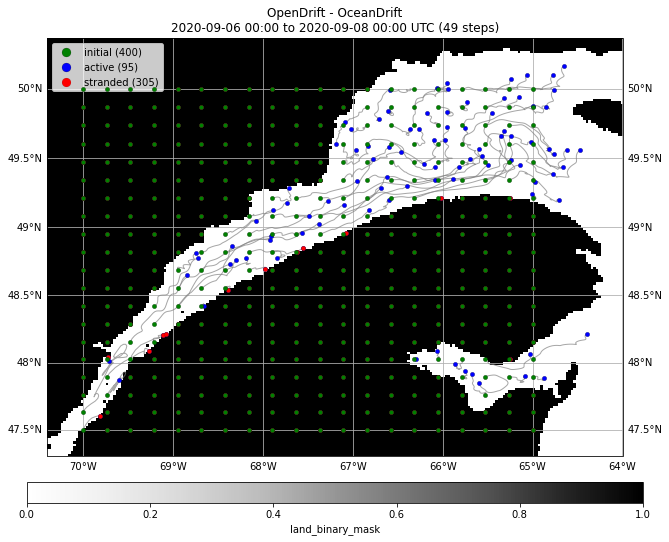

(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2020-09-06 00:00 to 2020-09-08 00:00 UTC (49 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda/envs/opendrift_NEMO_reader_test/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [15]:
o2D.plot(fast=True, background='land_binary_mask', hide_landmask=True,cmap='Greys')